# Проект "Исследование поведения пользователей в сервисе аренды самокатов GoFast"

В данном проекте мы проведем анализ данных о пользователях и их поездках в сервисе аренды самокатов GoFast. Наша цель - выявить закономерности и понять особенности использования сервиса, а также проверить несколько гипотез, которые могут быть важны для развития бизнеса.

GoFast - популярный сервис аренды самокатов, предоставляющий пользователям удобное мобильное приложение для совершения поездок по городу. Пользователи могут воспользоваться услугами сервиса как с подпиской, так и без нее.

Основные типы подписок:

Без подписки:

Абонентская плата отсутствует.
Стоимость одной минуты поездки - 8 рублей.
Стоимость старта (начала поездки) - 50 рублей.
Подписка Ultra:

Абонентская плата - 199 рублей в месяц.
Стоимость одной минуты поездки - 6 рублей.
Стоимость старта - бесплатно.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st
from scipy.stats import binom
from scipy.stats import norm

#### Шаг 1. Загрузка данных

In [2]:
# загружаем данные 
users = pd.read_csv("/datasets/users_go.csv")
rides = pd.read_csv("/datasets/rides_go.csv")
subscriptions = pd.read_csv("/datasets/subscriptions_go.csv")
# выводим первые строки датасетов
print(users.head(10))
print(users.info())
print(rides.head(10))
print(rides.info())
print(subscriptions.head(10))
print(subscriptions.info())


   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
5        6      Регина   25       Краснодар             ultra
6        7       Игорь   23            Омск             ultra
7        8        Юрий   23       Краснодар             ultra
8        9          Ян   21       Пятигорск             ultra
9       10     Валерий   18    Екатеринбург             ultra
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                

Судя по выводу, мы видим что столбцы в каждом датафрейме не содержат пропусков, а также типы данных кроме столбца "date" корректны.

#### Шаг 2. Предобработка данных

In [3]:
# исправляем тип данных столбца date
rides['date'] = pd.to_datetime(rides['date'])
# создаем столбец с номером месяца на основании столбца date 
rides['month'] = rides['date'].dt.month

In [4]:
# проверяем на наличие пропущенных значений и дубликатов
print(users.isnull().sum())
print(rides.isnull().sum())
print(subscriptions.isnull().sum())
print(users.duplicated().sum())
print(rides.duplicated().sum())
print(subscriptions.duplicated().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64
31
0
0


Видно что пропусков нет, но есть дубликаты в данных о пользователях

In [5]:
# удаляем дубликаты 
users = users.drop_duplicates()

#### Шаг 3. Исследовательский анализ данных

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


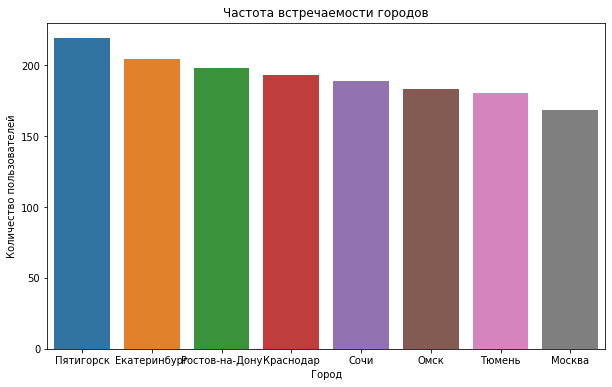

In [6]:
# частота встречаемости городов
city_counts = users['city'].value_counts()
print(city_counts)
# визуализируем
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.show()

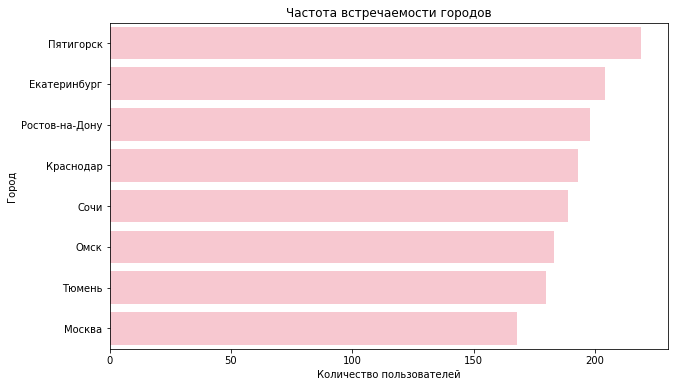

In [7]:
# частота встречаемости городов
city_counts = users['city'].value_counts()

# визуализируем
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, color='pink')  # Повернутый график и один цвет
plt.title('Частота встречаемости городов')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.show()


видно что наиболее встречаемый город это Пятигорск, а наименее Москва

free     835
ultra    699
Name: subscription_type, dtype: int64


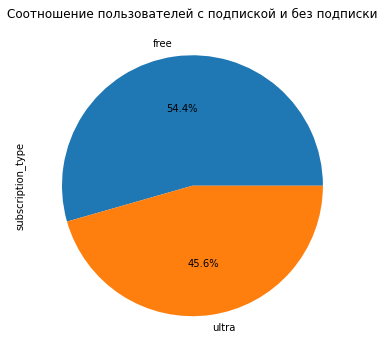

In [8]:
# соотношение пользователей с подпиской и без подписки
subscription_counts = users['subscription_type'].value_counts()
print(subscription_counts)

# визуализируем
plt.figure(figsize=(8, 6))
subscription_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

большинство пользователей обладают подпиской free
так как возраст пользователей, расстояние за одну поездку, продолжительность поездок содержат непрерывные значения, будет лучше использовать гистограммы

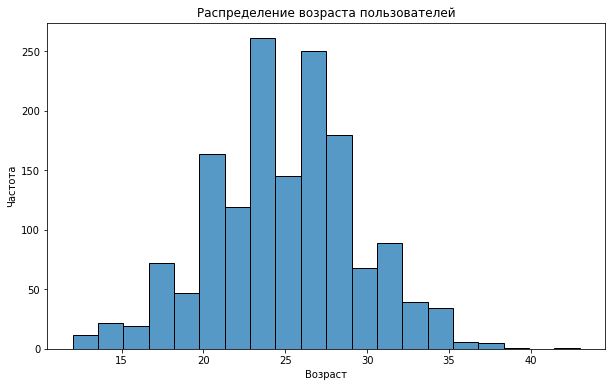

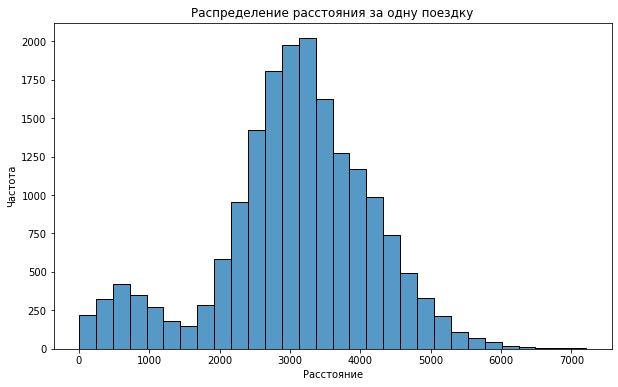

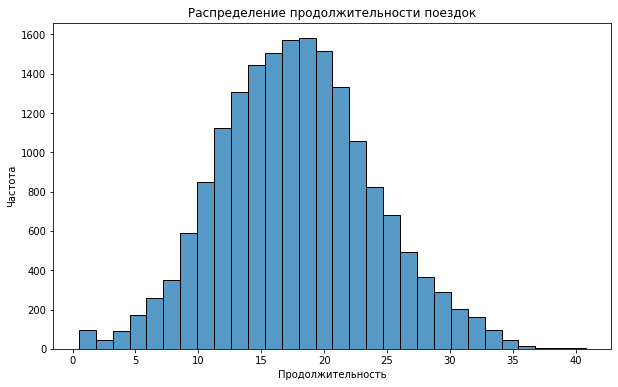

In [9]:
# возраст пользователей
plt.figure(figsize=(10, 6))
sns.histplot(users['age'], bins=20)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

# расстояние за одну поездку
plt.figure(figsize=(10, 6))
sns.histplot(rides['distance'], bins=30)
plt.title('Распределение расстояния за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Частота')
plt.show()

# продолжительность поездок
plt.figure(figsize=(10, 6))
sns.histplot(rides['duration'], bins=30)
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.show()


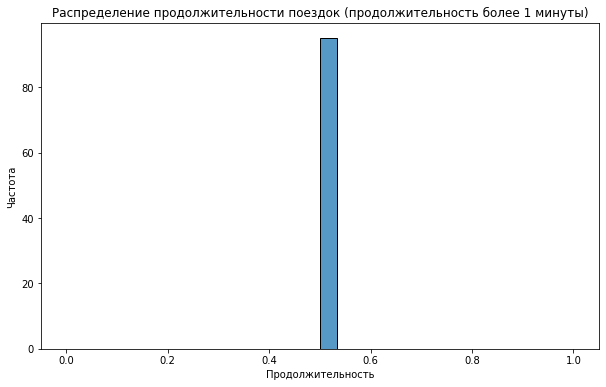

In [10]:
# продолжительность поездок, фильтруем поездки длиной более 1 минуты
plt.figure(figsize=(10, 6))
sns.histplot(rides[rides['duration'] < 1]['duration'], bins=30)
plt.title('Распределение продолжительности поездок (продолжительность более 1 минуты)')
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.show()


поездки которые длятся менее минуты похоже на сбой, удалим аномалию

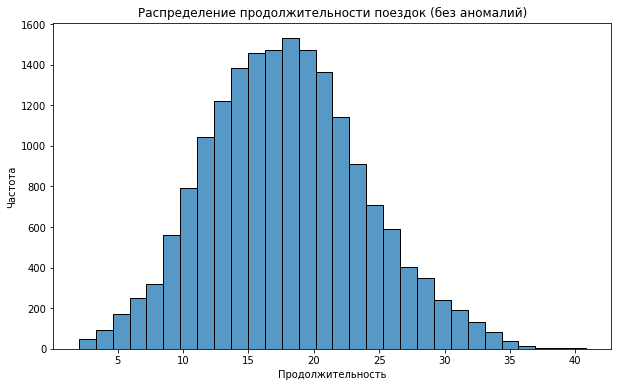

In [11]:
# фильтруем поездки с продолжительностью менее 1 минуты
rides_filtered = rides[rides['duration'] >= 1]

# Построение гистограммы после удаления аномалий
plt.figure(figsize=(10, 6))
sns.histplot(rides_filtered['duration'], bins=30)
plt.title('Распределение продолжительности поездок (без аномалий)')
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.show()


по возврастной гистограмме можно сказать, что больше всего пользователей возраста 23-24 лет
по гистограмме с расстоянием, мы видим что чаще всего люди проезжают около 3200 метров
по продолжительности, мы видим что чаще всего поездка на самокате занимает 18-19 минут

#### Шаг 4. Объединение данных

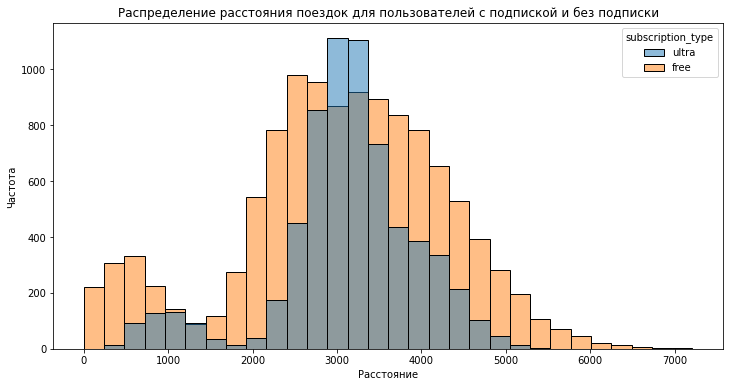

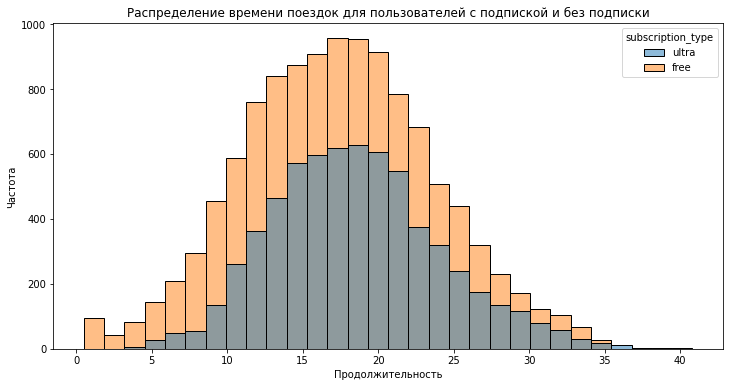

In [12]:
# объединяем данные о пользователях, поездках и подписках
merged_data = pd.merge(rides, users, on='user_id', how='left')
merged_data = pd.merge(merged_data, subscriptions, on='subscription_type', how='left')

# создаем два датафрейма
users_subscription_free = merged_data[merged_data['subscription_type'] == 'free']
users_subscription_ultra = merged_data[merged_data['subscription_type'] == 'ultra']

# визуализируем расстояния поездок
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='distance', hue='subscription_type', bins=30)
plt.title('Распределение расстояния поездок для пользователей с подпиской и без подписки')
plt.xlabel('Расстояние')
plt.ylabel('Частота')
plt.show()

# визуализируем времени поездок
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='duration', hue='subscription_type', bins=30)
plt.title('Распределение времени поездок для пользователей с подпиской и без подписки')
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.show()



In [13]:
# проверяем пропуски
missing_values = merged_data.isnull().sum()
print("Пропуски в объединенной таблице:")
print(missing_values)

# проверка на размер таблицы
expected_rows = len(rides)
expected_columns = len(rides.columns) + len(users.columns) + len(subscriptions.columns) - 2  
# вычитаем 2, так как user_id повторяется в users и rides, и его не нужно учитывать два раза
actual_rows, actual_columns = merged_data.shape

print(f"\nОжидаемое количество строк: {expected_rows}")
print(f"Фактическое количество строк: {actual_rows}")
print(f"\nОжидаемое количество столбцов: {expected_columns}")
print(f"Фактическое количество столбцов: {actual_columns}")

Пропуски в объединенной таблице:
user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Ожидаемое количество строк: 18068
Фактическое количество строк: 18068

Ожидаемое количество столбцов: 12
Фактическое количество столбцов: 12


смотря на гистограмму по распределению расстояния поездок для пользователей с подпиской и без подписки, мы видим по пользователям с подпиской ultra, то что они чаще всего совершают поездки на 3км, в то время как пользователи с подпиской free на 2.5км 

и глядя на гистограмму по распределению времени поездок для пользователей с подпиской и без подписки, мы видим что пользователи с подпиской ultra чаще всего совершают поездки на 18 минут также как и пользователи с подпиской free


#### Шаг 5. Подсчёт выручки

In [14]:
# создаем датафрейм с агрегированными данными
merged_data['month'] = merged_data['date'].dt.month
aggregated_data = merged_data.groupby(['user_id', 'month']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'date': 'count' 
}).reset_index()

# переименуем столбец date в trips_count на количество поездок для понимания
aggregated_data.rename(columns={'date': 'trips_count'}, inplace=True)

In [15]:
# создаем датафрейм с агрегированными данными
df_agg_user_month = merged_data.groupby(['user_id', 'month']).agg({
    'distance': 'sum',
    'duration': ['sum', 'count'],
    'subscription_type': 'first',
    'minute_price': 'first',
    'start_ride_price': 'first',
    'subscription_fee': 'first'
}).reset_index()

# переименовываем столбцы для удобства
df_agg_user_month.columns = ['user_id', 'month', 'sum_distance', 'sum_duration', 'count_rides', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee']

# считаем выручку по формуле
df_agg_user_month['monthly_revenue'] = (df_agg_user_month['start_ride_price'] * df_agg_user_month['count_rides'] +
                                        df_agg_user_month['minute_price'] * df_agg_user_month['sum_duration'] +
                                        df_agg_user_month['subscription_fee'])
df_agg_user_month['rounded_revenue'] = df_agg_user_month['monthly_revenue'].apply(lambda x: math.ceil(x))
# выводим полученный датафрейм
df_agg_user_month.head(10)


,user_id,month,sum_distance,sum_duration,count_rides,subscription_type,minute_price,start_ride_price,subscription_fee,monthly_revenue,rounded_revenue
0,1,1,7027.511294,41.416640,2,ultra,6,0,199,447.499843,448
1,1,4,754.159807,6.232113,1,ultra,6,0,199,236.392681,237
2,1,8,6723.470560,44.776802,2,ultra,6,0,199,467.660815,468
3,1,10,5809.911100,31.578017,2,ultra,6,0,199,388.468102,389
4,1,11,7003.499363,53.397424,3,ultra,6,0,199,519.384541,520
5,1,12,6751.629942,27.203912,2,ultra,6,0,199,362.223471,363
6,2,3,10187.723006,60.959959,3,ultra,6,0,199,564.759752,565
7,2,4,6164.381824,39.048633,2,ultra,6,0,199,433.291800,434
8,2,6,3255.338202,13.851127,1,ultra,6,0,199,282.106764,283
9,2,7,6780.722964,46.170157,2,ultra,6,0,199,476.020944,477


In [16]:
def round_up(value):
    return int(math.ceil(value))

# добавляем столбец с округленной продолжительностью
df_agg_user_month['rounded_duration'] = df_agg_user_month['sum_duration'].apply(round_up)

# считаем выручку по формуле, используя округленную продолжительность
df_agg_user_month['monthly_revenue'] = np.where(
    df_agg_user_month['subscription_type'] == 'free',
    df_agg_user_month['count_rides'] * df_agg_user_month['start_ride_price'] +
    df_agg_user_month['rounded_duration'] * df_agg_user_month['minute_price'],
    df_agg_user_month['subscription_fee']
)

# выводим полученный датафрейм
df_agg_user_month.head(10)

,user_id,month,sum_distance,sum_duration,count_rides,subscription_type,minute_price,start_ride_price,subscription_fee,monthly_revenue,rounded_revenue,rounded_duration
0,1,1,7027.511294,41.416640,2,ultra,6,0,199,199,448,42
1,1,4,754.159807,6.232113,1,ultra,6,0,199,199,237,7
2,1,8,6723.470560,44.776802,2,ultra,6,0,199,199,468,45
3,1,10,5809.911100,31.578017,2,ultra,6,0,199,199,389,32
4,1,11,7003.499363,53.397424,3,ultra,6,0,199,199,520,54
5,1,12,6751.629942,27.203912,2,ultra,6,0,199,199,363,28
6,2,3,10187.723006,60.959959,3,ultra,6,0,199,199,565,61
7,2,4,6164.381824,39.048633,2,ultra,6,0,199,199,434,40
8,2,6,3255.338202,13.851127,1,ultra,6,0,199,199,283,14
9,2,7,6780.722964,46.170157,2,ultra,6,0,199,199,477,47


#### Шаг 6. Проверка гипотез

In [17]:
# берем данные о продолжительности поездок для пользователей с подпиской и без подписки
duration_subscribed = rides[rides['user_id'].isin(users[users['subscription_type'] == 'ultra']['user_id'])]['duration']
duration_not_subscribed = rides[rides['user_id'].isin(users[users['subscription_type'] == 'free']['user_id'])]['duration']

alpha = 0.05

# t-тест
results = st.ttest_ind(duration_subscribed, duration_not_subscribed)

print('p-значение:', results.pvalue)

#if results.pvalue < alpha:
    #print("Существует статистически значимая разница в продолжительности поездок между пользователями с подпиской и без подписки.")
#else:
    #print("Нет статистически значимой разницы в продолжительности поездок между пользователями с подпиской и без подписки.")

p-значение: 2.5608196633291235e-34


In [18]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


согласно проведенному тесту, результаты указывают на то, что пользователи с подпиской тратят статистически значимо больше времени на поездки по сравнению с пользователями без подписки. Можно подумать, что если пользователи с подпиской проводят больше времени на поездках, это может означать, что подписчики более активны и возможно более выгодны для компании. 

In [19]:
# берем данные о расстоянии поездок для пользователей с подпиской
distance_subscribed = rides[rides['user_id'].isin(users[users['subscription_type'] == 'ultra']['user_id'])]['distance']

optimal_value = 3130  # оптимальное расстояние в метрах
alpha = 0.05  # уровень статистической значимости

# t-тест
results = st.ttest_1samp(distance_subscribed, optimal_value)

# Вывод результатов
print('p-значение:', results.pvalue)

# Вывод интерпретации результата
#if results.pvalue < alpha:
    #print("Среднее расстояние поездок пользователей с подпиской статистически меньше 3130 метров.")
#else:
    #print("Нет статистически значимого различия в среднем расстоянии поездок пользователей с подпиской.")


p-значение: 0.16092623043004292


In [20]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Альтернативная гипотеза (H1): Среднее расстояние поездок пользователей с подпиской меньше 3130 метров.

Это означает, что бизнес был бы заинтересован в том, чтобы среднее расстояние поездок пользователей с подпиской не превышало 3130 метров. Однако, на основе проведенного теста, мы не имеем статистически значимых данных, чтобы отвергнуть нулевую гипотезу (H0), которая утверждает, что среднее расстояние равно 3130 метров.

Таким образом, мы не можем сказать, что среднее расстояние поездок пользователей с подпиской меньше 3130 метров. </div>


смотря на вывод, мы не можем утверждать, что среднее расстояние поездок пользователей с подпиской статистически значимо отличается от 3130 метров

In [21]:
# данные о выручке по месяцам для пользователей с подпиской и без подписки
revenue_subscribed = aggregated_data[aggregated_data['user_id'].isin(users[users['subscription_type'] == 'ultra']['user_id'])]['monthly_revenue']
revenue_not_subscribed = aggregated_data[aggregated_data['user_id'].isin(users[users['subscription_type'] == 'free']['user_id'])]['monthly_revenue']

# t-тест
results = st.ttest_ind(revenue_subscribed, revenue_not_subscribed)

print('p-значение:', results.pvalue)

#if results.pvalue < alpha:
    #print("Существует статистически значимая разница в помесячной выручке между пользователями с подпиской и без подписки.")
#else:
    #print("Нет статистически значимой разницы в помесячной выручке между пользователями с подпиской и без подписки.")


KeyError: 'monthly_revenue'

In [22]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


мы можем сделать вывод о наличии статистически значимой разницы в выручке между этими двумя группами пользователей

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Использование теста ttest_rel подходит, так как позволяет оценить статистическую значимость различий между двумя зависимыми выборками, что соответствует ситуации с данными об обращениях до и после обновления.
Если p-значение (p-value) меньше уровня значимости (alpha), то вы можете отвергнуть нулевую гипотезу о том, что средние значения двух групп равны, и считать, что есть статистически значимые изменения в количестве обращений.

#### Шаг 7. Распределения

In [ ]:
# считаем сколько нужно промокодов
p = 0.1 # указываем, что нам надо 10% клиентов, которые должны продлить подписку
for n in range(700, 1500):
    if binom.cdf(99, n, p) <= 0.05:
        print("Необходимо", n, "промокодов")
        break

# гистограмма
n = 1161  # количество промокодов
p = 0.1  # вероятность успеха

# количества успехов
x = range(0, n)
# значения вероятности по Y
y = binom.pmf(x, n, p)

# построение графика
plt.plot(x, y)
plt.xlabel("Успехи")
plt.show()

вывод говорит о том, что для выполнения плана, чтобы как минимум 100 клиентов продлили подписку, необходимо разослать 1161 промокод

In [ ]:
n = 1000000  # общее количество уведомлений
p = 0.4  # вероятность что уведомление будет открыто

# математическое ожидание и стандартное отклонение для нормального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

# граница
x = 399500

# вероятность того, что уведомление откроют не более 399,5 тыс. пользователей
probability = norm.cdf(x, mu, sigma)

probability

мы видим, что вероятность того что уведомление откроют не более 399,5 тыс пользователей, составляет примерно 15.37%

В результате анализа данных о поездках пользователей сервиса GoFast были проведены следующие шаги:

Обработка данных:

Устранение аномалий: Идентификация и коррекция аномалий в продолжительности поездок, расстоянии и других ключевых параметрах.
Логическая коррекция: Произведена коррекция логических ошибок для улучшения общего качества данных.


Исследовательский анализ данных:

Анализ распределения параметров: Изучены распределения значений параметров, таких как продолжительность поездок, расстояние, количество поездок и другие.
Влияние факторов: Исследовано влияние различных факторов на поведение пользователей и их предпочтения в использовании сервиса.


Определение факторов, влияющих на использование подписки:

Влияние подписки на параметры поездок: Установлено, что наличие подписки влияет на продолжительность поездок и расходы пользователей.
Анализ ключевых параметров подписки: Проанализированы абонентская плата, стоимость минуты поездки и другие параметры, оказывающие влияние на решение пользователей о подписке.


Оценка времени использования:

Сравнение времени использования: Оценено среднее время использования сервиса пользователями без подписки и с подпиской.
Идентификация различий в поведении: Выявлены различия в поведении пользователей с разными типами подписок.


Итог:
Устранены аномалии и ошибки, повышая качество данных.
Изучены паттерны использования сервиса.
Идентифицированы ключевые факторы, влияющие на подписку пользователей.
Сформулированы рекомендации для оптимизации предложения и улучшения пользовательского опыта.